In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [65]:
df = pd.read_csv(r'C:\Users\Awoleye\Downloads\archive (17)\insurance.csv')

In [66]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [68]:
encoder.fit_transform(df[['sex']])


<1338x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [69]:
encoder.fit_transform(df[['region']])

<1338x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [70]:
df =  pd.concat([encode, df], axis=1)

In [71]:
df['sex_female'] = df['sex_female'].astype(int) 

In [72]:
df['sex_male'] = df['sex_male'].astype(int) 

In [73]:
df['region_northeast'] = df['region_northeast'].astype(int) 

In [74]:
df['region_northwest'] = df['region_northwest'].astype(int) 

In [75]:
df['region_southeast'] = df['region_southeast'].astype(int) 

In [76]:
df['region_southwest'] = df['region_southwest'].astype(int) 

In [77]:
df = df.drop(['region'], axis= 1)

In [79]:
df = df.drop(['smoker'], axis= 1)

In [81]:
df = df.drop(['sex'], axis= 1)

In [82]:
df

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,0,0,1,19,27.900,0,16884.92400
1,0,1,0,0,1,0,18,33.770,1,1725.55230
2,0,1,0,0,1,0,28,33.000,3,4449.46200
3,0,1,0,1,0,0,33,22.705,0,21984.47061
4,0,1,0,1,0,0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,1,0,0,50,30.970,3,10600.54830
1334,1,0,1,0,0,0,18,31.920,0,2205.98080
1335,1,0,0,0,1,0,18,36.850,0,1629.83350
1336,1,0,0,0,0,1,21,25.800,0,2007.94500


In [85]:
X = df[['sex_female', 'sex_male','region_northeast','region_northwest','region_southeast',
        'region_southwest','age','bmi','children']]
y = df[['charges']]

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0000)

In [87]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.impute import SimpleImputer

In [153]:
#print(X_train.reshape(1, X_train.shape))
# np.array(X_train.shape).reshape(1, 1070, 9)
(X_train.shape[0], X_train.shape[0], X_train.shape[1])

(1070, 1070, 9)

In [166]:
model_0 =tf.keras.Sequential([
    layers.Dense(128, input_shape = (X_train.shape[1],)),
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "relu")
])

In [167]:
model_0.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
(X_train.shape[0], 1070, 9)

(1070, 1070, 9)

In [169]:
model_0.compile(loss= tf.keras.losses.mse,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["mse"])

In [170]:
history = model_0.fit(X_train, 
                      y_train, 
                      epochs=10
                      )                                      

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 309808512.0000 - mse: 309808512.0000
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 304031648.0000 - mse: 304031648.0000
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 315426496.0000 - mse: 315426496.0000
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 314552288.0000 - mse: 314552288.0000
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 298445088.0000 - mse: 298445088.0000
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313239872.0000 - mse: 313239872.0000
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 306690048.0000 - mse: 306690048.0000
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 306034016.0000 - mse: 306034016.0000
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 312299232.0000 - mse: 312299232.0000
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 330874880.0000 - mse: 330874880.0000


{'loss': [317637312.0, 317637344.0, 317637408.0, 317637376.0, 317637344.0, 317637312.0, 317637376.0, 317637376.0, 317637376.0, 317637344.0], 'mse': [317637312.0, 317637344.0, 317637408.0, 317637376.0, 317637344.0, 317637312.0, 317637376.0, 317637376.0, 317637376.0, 317637344.0]}


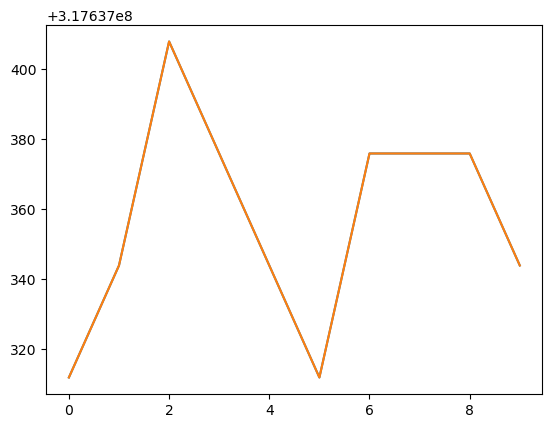

In [172]:
print(history.history)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['mse'], label = 'mse')